# 1.Preparación

## 1.1.Cargar el dataset   [R]
### Tablas de palabras en esta version  

In [1]:
# Montar google drive, con el objetivo de cargar el 'dataset' desde drive.
# Sacar el # para usar en colab.
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
# Establecer la ruta del 'dataset'
# Sacar el # par usar en colab.
root_path = 'drive/My Drive/wm_cnn/'  

# Redefinir local_path por 'shared drive'
# Establecer el directorio del dataset.
#local_path= root_path 

# Establecer la ruta del 'dataset'
local_path = './'
# Poner el # para usar en colab.
#root_path = local_path

data_folder = root_path + 'data/'
language = 'English'
lang_test = data_folder +language+'.train.txt'
# Probar que se puede imprimir una línea.
file1 = open(lang_test,"r") 
print(file1.readlines(20))


[' t iː \n', ' s t ʌ t ə ɹ \n']


## 1.2.Configurar los módulos 
- Configurar el entorno, librerías, función 'reader'.  
- Importar los datos - train, valid, test.  
- Visualizarlos.
- Establecer el tamaño de secuencia.

In [6]:
#copy the reader file to the root.
from shutil import copyfile
copyfile(root_path + '/'+ 'wordreader.py', 'wordreader.py')

'wordreader.py'

In [7]:
# Changed reader.  Recompile.
import py_compile
py_compile.compile('wordreader.py')

'__pycache__/wordreader.cpython-36.pyc'

In [8]:
# Importación de librerías.
from __future__ import print_function
import os
# Usar tarjeta simple. Se debe ejecutar antes de tensorflow.
os.environ["CUDA_VISIBLE_DEVICES"]="0" 
import pylab
%pylab inline
# Librerías gráficas
import matplotlib.pyplot as plt
import matplotlib  
%matplotlib inline
# Framework Tensorflow
import tensorflow as tf
# Librerías numéricas y para el uso de dataframes.
import numpy as np
import pandas as pd
import random

# Funciones para leer el dataset.
from wordreader import lang_word_data

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [10]:
# Leer el dataset y preparar los conjuntos de entrenamiento, validación y prueba, e ID de palabras
train_data, valid_data, test_data, word_to_id = lang_word_data(root_path + 'data', lang=language) # tokens
id_to_word = dict((v, k) for k, v in word_to_id.items())
voc_size = len(id_to_word)
voc_size

50

In [11]:
# Imprimir la cantidad de archivos para validación, prueba.
print('Train data size: {0}, Valid data size: {1}, Test data size: {2}\n'.
      format(len(train_data), len(valid_data), len(test_data)))
print('train/val/test_data is a list, some elements in train_data is', train_data[:10])

Train data size: 1031, Valid data size: 222, Test data size: 222

train/val/test_data is a list, some elements in train_data is [[2, 21], [4, 2, 20, 2, 8, 13], [16, 17, 12, 8, 6, 3], [16, 17, 12, 3, 5], [16, 27, 2], [11, 3, 33, 16, 24, 7], [12, 20, 43, 8, 9, 3, 5, 6, 24], [14, 18, 2], [4, 7, 18, 6], [2, 21, 33, 8, 13]]


In [12]:
# Imprimir los primeros y últimos 5 registros del dataframe word_id
word_id = pd.DataFrame.from_dict(word_to_id, orient='index').sort_values(by=0, ascending=True)
word_id.columns = ['id']
print(word_id.head())
print(word_id.tail())


       id
<nul>   0
<s>     1
t       2
ɪ       3
s       4
       id
ɛə     45
ɔɪ     46
ʊə     47
ʒ      48
<unk>  49


In [13]:
# Imprimir los primeros y últimos 5 registros del dataframe id_word
id_word = pd.DataFrame.from_dict(id_to_word, orient='index')
id_word.columns = ['word']
print(id_word.head())
print(id_word.tail())

    word
0  <nul>
1    <s>
2      t
3      ɪ
4      s
     word
45     ɛə
46     ɔɪ
47     ʊə
48      ʒ
49  <unk>


In [14]:
# Juntar e imprimir una secuencia.
# data esta en forma de lista palabras de lista de secuencias de segmentos IPA.
transf = lambda word:' '.join([id_to_word[id] for id in word])
# WTF - funciona!
print([transf(word) for word in train_data[:10]])
print([transf(word) for word in train_data[-10:]])


['t iː', 's t ʌ t ə ɹ', 'f æ m ə l ɪ', 'f æ m ɪ n', 'f ɑː t', 'p ɪ tʃ f ɔː k', 'm ʌ ð ə r ɪ n l ɔː', 'b eɪ t', 's k eɪ l', 't iː tʃ ə ɹ']
['s m ɑː t', 'm ɛ n ɪ', 'l ɑː tʃ', 'f ɔː dʒ', 'p l eɪ', 'j uː', 's p ɪə ɹ', 'ɜː θ k w eɪ k', 't ɜː m aɪ t', 'tʃ ɪ n']


In [0]:
# Establecer el tamaño de secuencia.
# En WOLD el max es 22 secuencias y muchos son < 10.
# Entonces, 50 seria suficiente para a el max y puede acomodar algunos en el mismo lote.
seq_len = 50 


# 2.Gated CNN model  

- Las palabras en secuencia están representadas por sus «embeddings»  
- Aplicar convoluciones de ancho k a los «embeddings» para calcular matrices A y B.  
- Aplicar activación $\sigma()$ a la matrix B para construir la compuerta «gate» 
- Multiplicar por elemento entre A y B para aplicar el «gate».  Es como la función de GRU o LSTM!  
- Cada pila de convolución y «gate» es una unidad.  
- Apilar unidades para formar bloques.  
- Apilar bloques para formar «chunks».  
- Terminar con «softmax» para producir probabilidades de palabras.

### No es recurrente.  Es convolucional y se puede procesar en paralelo.  

[Language Modeling with Gated Convolutional Networks -- arxiv-1612.08083 -- Facebook AI Research](https://arxiv.org/abs/1612.08083)
![Gated CNN model](https://github.com/stikbuf/Language_Modeling/blob/dev/figures/Gated%20CNN.png?raw=true)

## 2.1.Data generator [J]

Actualizado para tratar con palabras individuales.

- Capacitar para train, valid, y test  
- Aplicar randomizado a cada epoca
- Cada palabra aparte hacia un largo maximo de seq_len
- Repetir bucle  
- Indicadores integrales y categóricos para las secuencias de caracteres.  

In [0]:

# El generador «Generator» entrega palabras de secuencias en forma de id y categoria (1-hot).
# Truncar las palabras en el fin de secuencia. Seria mas complicado poner <nul> en las secuencias!
#
# Poner palabras en secuencia separados por un 'flag' como '<s>'.
# Necesitaría incluir '<s>' en entrenamiento de los embeddings en este caso.

import random

from tensorflow.python.keras.utils import to_categorical 

def gen_word_word(batch_size=128, dataset='train'):
    assert dataset in ['train', 'valid', 'test'], 'Dataset must be train or valid or test.'
    # Cada elemento de la data es secuencia de caracteres de una palabra. 
    # Llenamos el lota hasta no cabe mas palabras, separados por '<s>'.
    s_Id = word_to_id['<s>']
    
    def gen_lote_rand(j, data):
        # Poner palabras en orden random. Para que el red no aprenderlo.
        sz = 1 # <s> en el inicio
        lst = []
        while sz < seq_len:
            if len(data[j]) < seq_len - sz:
                lst.append(data[j])
                sz += len(data[j]) + 1 # Agregar un '<s>' entre palabras.
                j = (j+1) % len(data)
            else:
                # No hay espacio por toda la palabra y '<s>' mas.
                break 
                
        # OK, tenemos lista de palabras para el lote.
        random.shuffle(lst)
        # Asemblar el lote.
        lstout = [s_Id] + [val for sublst in [l+[s_Id] for l in lst] for val in sublst]
        
        # Agregamos parte de palabra si no esta lleno el lote.
        # Pongamos hasta podemos? Cambia las otras probabilidades como efecto colateral.
        # Pero mas complicado inroducir otra caracter <nul>:0.
        # Entonces quedamos con truncar la ultima palabra de la secuencia.
        # Como repetimos las palabras muchas veces no es tanto impacto. Parece +1 en la perpljidad.
        #
        # No llenar el lote
        #if sz < seq_len:
        #    parcial = data[j][:seq_len-sz]
            #print(lstout)
            #print('word', data[j], 'parcial', parcial, j, sz)
        #    lstout.extend(parcial)

        return lstout
    
    dic = {'train':train_data, 'valid':valid_data, 'test':test_data}
    data = dic[dataset]
       
    while True:
        # Randomizar por palabra; este respeta la integridad de las palabras.
        # data en forma de lista de palabras; cada palabra es una lista de ids.
        # Los Ids corresponde con secuencias de caracteres.
        rnd_idxs = list(range(len(data)))
        random.shuffle(rnd_idxs)
        cnt = 0
        
        # Procesar una epoca en forma de tandas «batches».
        # Empezar un lote hasta la ultima palabra de corpus.
        # Hay que volver al inicio para llenar el lote.
        # D significa data antes de separar X y Y
        while cnt < len(rnd_idxs) - batch_size:
            X = np.zeros((batch_size, seq_len))
            for i in range(batch_size):
                j = rnd_idxs[cnt]
                # Poner los palabras hasta llenar el lote. 
                # Construir lista con len() <= seq_len.
                lote = gen_lote_rand(j, data)
                
                X[i,:len(lote)] = lote
                cnt += 1

            # 'Y' excluye el inicio y 'X' excluye el último.
            # Como en traduccion, el Y anticipa el X
            Y = X[:,1:]
            X = X[:,:-1]
            Y = to_categorical(Y, num_classes=voc_size)
            yield X, Y

In [17]:
# Primera secuencia de 'train' para observar.
for x, y in gen_word_word(32):
  print(len(x))
  print(x.shape, y.shape)
  # Empieza con <nul/> seguida por la secuencia.
  print(x[0])
  print(x[1])
  print(x[2])

  print(' '.join([id_to_word[id] for id in x[0]]))
  print(' '.join([id_to_word[id] for id in x[1]]))
  print(' '.join([id_to_word[id] for id in x[2]]))

  print(len(y))
  # Empieza con la secuencia.  
  print(y[0][-5:])
  print(y[1][-5:])
  print(y[2][-5:])

  break

32
(32, 49) (32, 49, 50)
[ 1. 44.  6. 19. 14.  1.  9.  3. 11.  6. 22.  1. 10.  9. 20. 34.  7.  1.
 28.  3.  7.  2.  8.  9.  3.  1.  9. 29. 16.  1.  2. 45. 13.  1.  4.  3.
  7.  1.  4. 11. 22. 10.  8. 13.  1.  0.  0.  0.  0.]
[ 1.  4. 21.  4.  1. 20.  5.  2. 22.  1.  2. 23. 22.  4.  1.  4.  7. 36.
  2.  1. 38. 15.  6. 19.  1. 24.  2.  8. 12.  1. 14. 22.  2.  1. 10. 21.
 11.  1. 14.  3.  4. 22. 10.  1. 14. 27.  7.  1.  0.]
[ 1.  4.  3. 28.  1. 15.  6. 16.  1.  4. 24.  6.  2.  1. 14. 27.  2.  8.
 13.  1.  7.  6. 26.  7.  1. 23. 36. 10.  1.  4.  2. 20. 12.  8.  7.  1.
 11. 21.  4.  1.  8. 14.  4.  7. 38. 47. 13.  1.  0.]
<s> ɪə l əʊ b <s> r ɪ p l aɪ <s> d r ʌ ŋ k <s> v ɪ k t ə r ɪ <s> r uː f <s> t ɛə ɹ <s> s ɪ k <s> s p aɪ d ə ɹ <s> <nul> <nul> <nul> <nul>
<s> s iː s <s> ʌ n t aɪ <s> t w aɪ s <s> s k ɜː t <s> j ɛ l əʊ <s> ɔː t ə m <s> b aɪ t <s> d iː p <s> b ɪ s aɪ d <s> b ɑː k <s> <nul>
<s> s ɪ v <s> ɛ l f <s> s ɔː l t <s> b ɑː t ə ɹ <s> k l ɒ k <s> w ɜː d <s> s t ʌ m ə k <s> p iː s <s> ə

## 2.1a Modulo para construir datos para el PPMI-SVD  

In [0]:
# Generar archivo para entren PPMI-SVD truncada.
from wordreader import lang_word_data

def gen_sequences(data=None, batch_size=32):
    
    # Cada elemento de la data es secuencia de caracteres de una palabra. 
    # Llenamos el lota hasta no cabe mas palabras, separados por '<s>'.
    s_Id = word_to_id['<s>']
    
    def gen_lote_rand(j, data):
        # Poner palabras en orden random. Para que el red no aprenderlo.
        sz = 1 # <s> en el inicio
        lst = []
        while sz < seq_len:
            if len(data[j]) < seq_len - sz:
                lst.append(data[j])
                sz += len(data[j]) + 1 # Agregar un '<s>' entre palabras.
                j = (j+1) % len(data)
            else:
                # No hay espacio por toda la palabra y '<s>' mas.
                break 
                
        # OK, tenemos lista de palabras para el lote.
        random.shuffle(lst)
        # Asemblar el lote.
        lstout = [s_Id] + [val for sublst in [l+[s_Id] for l in lst] for val in sublst]
        
        # Pongamos hasta podemos? Cambia las otras probabilidades como efecto colateral.
        # Pero mas complicado inroducir otra caracter <nul>:0.
        # Entonces quedamos con truncar la ultima palabra de la secuencia.
        # Como repetimos las palabras muchas veces no es tanto impacto. Parece +1 en la perpljidad.
        # 
        # No llenar el lote.
        #if sz < seq_len:
        #    parcial = data[j][:seq_len-sz]
            #print(lstout)
            #print('word', data[j], 'parcial', parcial, j, sz)
        #    lstout.extend(parcial)

        return lstout
        
    #data = train_data + valid_data
        
    while True:
        # Randomizar por palabra; este respeta la integridad de las palabras.
        # data en forma de lista de palabras; cada palabra es una lista de ids.
        # Los Ids corresponde con secuencias de caracteres.
        rnd_idxs = list(range(len(data)))
        random.shuffle(rnd_idxs)
        cnt = 0
        
        # Procesar una epoca en forma de tandas «batches».
        # Empezar un lote hasta la ultima palabra de corpus.
        # Hay que volver al inicio para llenar el lote.
        # D significa data antes de separar X y Y
        while cnt < len(rnd_idxs) - batch_size:
            X = np.zeros((batch_size, seq_len))
            for i in range(batch_size):
                j = rnd_idxs[cnt]
                # Poner los palabras hasta llenar el lote. 
                # Construir lista con len() <= seq_len.
                lote = gen_lote_rand(j, data)
                
                X[i,:len(lote)] = lote
                cnt += 1

            yield X
            


In [19]:
# Prueba

# Unit train_data con valid_data para construir los datos para PPMI-SVD.
# Leer el dataset y preparar los conjuntos de entrenamiento, validación y prueba, e ID de palabras
train_data, valid_data, test_data, word_to_id = lang_word_data(root_path + 'data', lang=language) # tokens
id_to_word = dict((v, k) for k, v in word_to_id.items())
voc_size = len(id_to_word)
print('language =',language, '- vocabulary =', voc_size)

data = train_data + valid_data

dataout = []
for x in gen_sequences(data, 4):
    dataout.append(x)
    break

#Probarlo.
print(len(dataout), len(dataout[0]), len(dataout[0][0]))
#print(data)
print(dataout[0][0])
print(' '.join([id_to_word[id] for id in dataout[0][0]]))

print(dataout[0][1])
print(' '.join([id_to_word[id] for id in dataout[0][1]]))

print(dataout[0][2])
print(' '.join([id_to_word[id] for id in dataout[0][2]]))

language = English - vocabulary = 50
1 4 50
[ 1.  2. 19.  1. 27. 12.  1.  4.  2.  9. 26. 34.  1. 12. 24.  2.  8. 13.
  1. 12. 20. 43.  8. 13.  1.  5. 37.  1.  4. 22. 10.  1. 30. 19.  6. 10.
  1. 12. 29. 28.  1.  9. 15.  4.  7. 38. 29.  1.  0.  0.]
<s> t əʊ <s> ɑː m <s> s t r ɒ ŋ <s> m ɔː t ə ɹ <s> m ʌ ð ə ɹ <s> n aʊ <s> s aɪ d <s> h əʊ l d <s> m uː v <s> r ɛ s k j uː <s> <nul> <nul>
[ 1.  4. 11.  3.  9.  3.  2.  1.  4.  2.  9. 26. 34.  1. 14. 15. 10.  1.
 37.  2.  9.  3. 25.  8. 13.  1.  5. 37.  1.  5. 21. 10. 35.  1.  9. 17.
 14.  3.  2.  1. 11.  6. 18.  2.  1. 30. 37. 32.  1.  0.]
<s> s p ɪ r ɪ t <s> s t r ɒ ŋ <s> b ɛ d <s> aʊ t r ɪ ɡ ə ɹ <s> n aʊ <s> n iː d l̩ <s> r æ b ɪ t <s> p l eɪ t <s> h aʊ z <s> <nul>
[ 1.  7. 27. 11.  3.  2.  1.  6. 21. 10.  1. 18.  7. 24.  5.  1.  8.  4.
  2. 26.  5.  3. 31.  2.  1. 16. 38. 29.  1. 25.  6. 27.  4.  3. 32.  1.
 23. 22. 32.  1.  3.  7.  4. 11.  6. 18.  5.  1.  0.  0.]
<s> k ɑː p ɪ t <s> l iː d <s> eɪ k ɔː n <s> ə s t ɒ n ɪ ʃ t <s> f j uː <s> ɡ

In [0]:
# Construir archivo
def makePPMISVDfiles(language):
    dataout = []
    num_it = 50
    it = 0

    train_data, valid_data, test_data, word_to_id = lang_word_data(root_path + 'data', lang=language) # tokens
    id_to_word = dict((v, k) for k, v in word_to_id.items())
    voc_size = len(id_to_word)
    print('language =',language, '- vocabulary =', voc_size)
    data = train_data + valid_data
    
    for x in gen_sequences(data, 32):
        dataout.append(x)
        it += 1
        if it>=num_it: break

    word_id = pd.DataFrame.from_dict(word_to_id, orient='index').sort_values(by=0, ascending=True)
    word_id.columns = ['id']
    print(word_id.head())
    print(word_id.tail())

    print("Largo - epoch, lote, secuencia:", len(dataout), len(dataout[0]), len(dataout[0][0]))
    #print(dataout[0])

    # Al archivo
    with open('data/'+language+'.ppmisvd.txt', 'w') as out:
        for epoch in dataout:
            for lot in epoch:
                #print(lot, file=out)
                print(' '.join([id_to_word[id] for id in lot]), file=out)


    with open('data/'+language+'.ppmisvd.num.txt', 'w') as out:
        for epoch in dataout:
            for lot in epoch:
                #print(lot, file=out)
                print(' '.join([str(int(id)) for id in lot]), file=out)



In [0]:
# Comentamos para no crear los archivos otra vez
#makePPMISVDfiles("English")
#makePPMISVDfiles("Hup")
#makePPMISVDfiles("Imbabura Quechua")
#makePPMISVDfiles("Mapudungun")
#makePPMISVDfiles("Wichí")

language = English - vocabulary = 50
       id
<nul>   0
<s>     1
t       2
ɪ       3
s       4
       id
ɛə     45
ɔɪ     46
ʊə     47
ʒ      48
<unk>  49
Largo - epoch, lote, secuencia: 50 32 50
language = Hup - vocabulary = 74
       id
<nul>   0
<s>     1
h       2
t       3
ʔ       4
       id
<unk>  69
v      70
c’     71
ĩ´     72
ɨ̃´    73
Largo - epoch, lote, secuencia: 50 32 50
language = Imbabura Quechua - vocabulary = 38
       id
<nul>   0
<s>     1
a       2
u       3
i       4
       id
<unk>  33
ú      34
c      35
q      36
β      37
Largo - epoch, lote, secuencia: 50 32 50
language = Mapudungun - vocabulary = 38
       id
<nul>   0
<s>     1
a       2
n       3
e       4
       id
ns     33
+      34
b      35
v      36
<unk>  37
Largo - epoch, lote, secuencia: 50 32 50
language = Wichí - vocabulary = 47
       id
<nul>   0
<s>     1
a       2
e       3
i       4
       id
<?>    42
ˀw     43
<unk>  44
b      45
c      46
Largo - epoch, lote, secuencia: 50 32 50


## 2.2.Imports [J]

- Es convolución «causal» . 
- Las entradas son antes de las salidas.  
- De verdad es necesario?  

The tf integrated keras does not support causal convolution, i.e. padding param can not be 'causal' in Conv1D. (see [WaveNet: A Generative Model for Raw Audio, section 2.1.](https://arxiv.org/abs/1609.03499) ), so we use original keras instead.

![causal convolutional layers](https://github.com/stikbuf/Language_Modeling/blob/dev/figures/causal_convolution.png?raw=true)

I recommend that you read the paper section 2

In [0]:
import keras
keras.__version__

'2.2.4'

## 2.3.Arquitectura [J]  

- Definir varias arquitecturas de unidades, bloques y «chunks»  
- Segun el paper, [k, n] => [ancho de convolución, cantidad filtros]  
- 128 hasta 4096 filtros!!!  
- Usamos la red convolucional GCNN_8B.  

Model config
![model configuration](https://github.com/stikbuf/Language_Modeling/blob/dev/figures/gCNNConfig.png?raw=true)

In [0]:
# del modelo con PTB
# embedding_size=128 en el paper base.
# cambiamos el embedding_size a 16 o 32.
GCNN_13 = [ [(4, 1268)] ]*1 ,\
          [ [(4,1268), (4,1268)] ]*12 
    
GCNN_14B = [ [(5, 512)] ]*1 ,\
           [ [(1,128), (5,128), (1,512)] ]*3 ,\
           [ [(1,512), (5,512), (1,1024)] ]*3 ,\
           [ [(1,1024), (5,1024), (1,2048)] ]*6 ,\
            [ [(1,1024), (5,1024), (1,4096)] ]*1 

# Deberia estar GCNN_5            
GCNN_9 = [ [(4, 807)] ]*1 ,\
          [ [(4,807), (4,807)] ]*4  
    
GCNN_8B = [ [(1, 512)] ]*1 ,\
           [ [(1,128), (5,128), (1,512)] ]*3 ,\
           [ [(1,256), (5,256), (1,512)] ]*3 ,\
           [ [(1,1024), (1,1024), (1,2048)] ]*1 

# embedding_size=208 in the paper
GCNN_8 = [ [(4, 900)] ]*1 ,\
           [ [(4,900)] ]*7

GCNN_14 = [ [(6, 850)] ]*3 ,\
           [ [(1,850)] ]*1 ,\
           [ [(5,850)] ]*4 ,\
           [ [(1,850)] ]*1 ,\
            [ [(4,850)] ]*3 ,\
            [ [(4,1024)] ]*1 ,\
            [ [(4,2048)] ]*1  
 
#
# Definido para el modelo de Words.

GCNN_8BS = [ [(1, 8)] ]*1 ,\
           [ [(1,8), (5,8), (1,16)] ]*1

GCNN_8S = [ [(4, 4)] ]*1 ,\
           [ [(4, 4)] ]*7

GCNN_2BS = [ [(1,16)] ]*1 ,\
           [ [(1,16), (3,16), (1,16)] ]*1

#modelParam

# 2.3A Experimentacion  
- Embedding (16, 32)
- Configuracion (unidades, bloques, chunks)
  - Variando ancho, filtros, #unidades, #bloques, #chunks.
- Regularizacion (Nada, l2(0.001, 0.001))  
- Language (English, Hup, Wichí, Mapudungun, Imbabura Quechua)

### Fuente de embedding
- En linea con el red neuronal
- Analisis de PPMI-SVD truncada.

### Mostramos los mas exitosos  

In [0]:
# Modelos para modelar palabras
GCNN_2BS216 = [ [(1,16)] ]*1 ,\
            [ [(1,16), (2,16), (1,16)] ]*1

GCNN_2S216 = [ [(2,16)] ]*1 ,\
            [ [(2,16), (2,16)] ]*1

GCNN_2BS316 = [ [(1,16)] ]*1 ,\
            [ [(1,16), (3,16), (1,16)] ]*1

GCNN_2S316 = [ [(3,16)] ]*1 ,\
            [ [(3,16), (3,16)] ]*1

GCNN_2BS416 = [ [(1, 16)] ]*1 ,\
           [ [(1,16), (4,16), (1,16)] ]*1

GCNN_2S416 = [ [(4, 16)] ]*1 ,\
           [ [(4,16), (4,16)] ]*1

GCNN_3BS216 = [ [(1,16)] ]*1 ,\
            [ [(1,16), (2,16), (1,16)] ]*2

GCNN_3S216 = [ [(2,16)] ]*1 ,\
            [ [(2,16), (2,16)] ]*2

GCNN_3BS316 = [ [(1,16)] ]*1 ,\
            [ [(1,16), (3,16), (1,16)] ]*2

GCNN_3S316 = [ [(3,16)] ]*1 ,\
            [ [(3,16), (3,16)] ]*2

GCNN_3BS416 = [ [(1,16)] ]*1 ,\
            [ [(1,16), (4,16), (1,16)] ]*2

GCNN_3S416 = [ [(4,16)] ]*1 ,\
            [ [(4,16), (4,16)] ]*2

GCNN_5BS216 = [ [(1,16)] ]*1 ,\
            [ [(1,16), (2,16), (1,16)] ]*3 ,\
            [ [(1,32), (1,32), (1, 32)] ]*1

GCNN_5S216 = [ [(2,16)] ]*1 ,\
            [ [(2,16), (2,16)] ]*3 ,\
            [ [ (2,32), (2,32)] ]

GCNN_5BS316 = [ [(1,16)] ]*1 ,\
            [ [(1,16), (3,16), (1,16)] ]*3 ,\
            [ [(1,32), (1,32), (1, 32)] ]*1

GCNN_5S316 = [ [(3,16)] ]*1 ,\
            [ [(3,16), (3,16)] ]*3 ,\
            [ [ (3,32), (3,32)] ]

GCNN_5BS416 = [ [(1,16)] ]*1 ,\
            [ [(1,16), (4,16), (1,16)] ]*3 ,\
            [ [(1,32), (1,32), (1,32)] ]*1

GCNN_5S416 = [ [(4,16)] ]*1 ,\
            [ [(4,16), (4,16)] ]*3 ,\
            [ [(4,32), (4,32)] ]*1
####

GCNN_2BS232 = [ [(1,32)] ]*1 ,\
            [ [(1,32), (2,32), (1,32)] ]*1

GCNN_2S232 = [ [(2,32)] ]*1 ,\
            [ [(2,32), (2,32)] ]*1

GCNN_2BS332 = [ [(1,32)] ]*1 ,\
            [ [(1,32), (3,32), (1,32)] ]*1

GCNN_2S332 = [ [(3,32)] ]*1 ,\
            [ [(3,32), (3,32)] ]*1

GCNN_2BS432 = [ [(1, 32)] ]*1 ,\
           [ [(1,32), (4,32), (1,32)] ]*1

GCNN_2S432 = [ [(4, 32)] ]*1 ,\
           [ [(4,32), (4,32)] ]*1

GCNN_3BS232 = [ [(1,32)] ]*1 ,\
            [ [(1,32), (2,32), (1,32)] ]*2

GCNN_3S232 = [ [(2,32)] ]*1 ,\
            [ [(2,32), (2,32)] ]*2

GCNN_3BS332 = [ [(1,32)] ]*1 ,\
            [ [(1,32), (3,32), (1,32)] ]*2

GCNN_3S332 = [ [(3,32)] ]*1 ,\
            [ [(3,32), (3,32)] ]*2

GCNN_3BS432 = [ [(1,32)] ]*1 ,\
            [ [(1,32), (4,32), (1,32)] ]*2

GCNN_3S432 = [ [(4,32)] ]*1 ,\
            [ [(4,32), (4,32)] ]*2

GCNN_5BS232 = [ [(1,32)] ]*1 ,\
            [ [(1,32), (2,32), (1,32)] ]*3 ,\
            [ [(1,64), (1,64), (1, 64)] ]*1

GCNN_5S232 = [ [(2,32)] ]*1 ,\
            [ [(2,32), (2,32)] ]*3 ,\
            [ [ (2,64), (2,64)] ]

GCNN_5BS332 = [ [(1,32)] ]*1 ,\
            [ [(1,32), (3,32), (1,32)] ]*3 ,\
            [ [(1,64), (1,64), (1,64)] ]*1

GCNN_5S332 = [ [(3,32)] ]*1 ,\
            [ [(3,32), (3,32)] ]*3 ,\
            [ [ (3,64), (3,64)] ]

GCNN_5BS432 = [ [(1,32)] ]*1 ,\
            [ [(1,32), (4,32), (1,32)] ]*3 ,\
            [ [(1,64), (1,64), (1,64)] ]*1

GCNN_5S432 = [ [(4,32)] ]*1 ,\
            [ [(4,32), (4,32)] ]*3 ,\
            [ [(4,64), (4,64)] ]*1



modelParam = GCNN_3BS332


I call:  
"(4, 1268)" a unit  
"[(4, 1268), (4, 1268)]" a block  
"[(4, 1268), (4, 1268)] * 12" a chunk  
A model is made by chunks.

GLU layer:
$$h_l(X) = (\textbf{X} * \textbf{W} + \textbf{b}) \otimes \sigma(\textbf{X} * \textbf{V} + \textbf{c})$$
implemented in `gatedCNNUnit()`

- Gated linear unit (GLU) - una unidad - una capa de «gated convolución»  
  - Mira arriba como es la construccion de un GLU
- Bloques compuesto de unidades - de capas  
  - Bloque tiene entrada agregada a su salida como en ResNet  
- Chunks compuesto de bloques.

In [0]:
# Define unidad y chunk. Bloque esta dentro el chunk.
from keras.layers import Conv1D, Multiply, Add, Input, Dense, Embedding
from keras.models import Model
from keras import regularizers
from keras import backend as K

# Una unidad consiste en una convolucion (lineal), gate (sigmoidal)
# entrada, y salida de convolución «gated» por el sigmoid.
# Regularizer agregado para mejor validacion.
def gatedCNNUnit(kernel_size=3, filters=1024, input_shape=None):
    inputs = Input(shape=input_shape)
    conv = Conv1D(filters=filters, kernel_size=kernel_size, data_format='channels_last',
                  #strides=1, padding='causal')(inputs)
                  strides=1, padding='causal',
                  kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001))(inputs)
    gated = Conv1D(filters=filters, kernel_size=kernel_size, data_format='channels_last',
                   strides=1, padding='causal', activation='sigmoid')(inputs)
    value = Multiply()([conv, gated])
    return Model(inputs=inputs, outputs=value)
    

# Un chunk consiste en algunos bloques de unidades, entrada y salida.
# Los bloques agregan sus entradas a sus salidas como en ResNet.
def gatedCNNChunk(chunk, input_shape):
    origin = Input(shape=input_shape)
    inputs = origin
    # Un chunk tiene múltiples bloques.
    # No necesariamente iguales.
    # Construir cada bloque.
    for block in chunk:
        x = inputs
        for unit in block:
            kernel_size, filters = unit
            # No usamos la dimension zero como parte de input_shape.
            x = gatedCNNUnit(kernel_size=kernel_size, filters=filters, input_shape=K.int_shape(x)[1:])(x)
        if K.int_shape(inputs)[-1] != K.int_shape(x)[-1]: # see Eqn.(2).in arxiv-1512.03385
            # Agregamos un nivel para proyectar los inputs al shape de x -- cuando son diferentes.
            inputs = Dense( K.int_shape(x)[-1])(inputs)
            #print('DIM CHANGE IN RES MOD!!')
        # Agregar las entradas a las salidas del bloque.
        x = Add()([inputs, x])
        inputs = x
    return Model(inputs=origin, outputs=x)

## 2.4.Construimos el modelo de chunks según el modelParam  

- Empezamos con la capa de «embedding»  
- Preprocesamos el modelParam para construir los «chunks»  
- Terminamos con «softmax» para predecir las palabras.  

In [0]:
# Usamos embedding_size de 16 o 32 valores.
# Embedding size = c * sqrt(voc_size)
# Como voc_size ≈ 25..150 para casi todas las lenguas y familias, es suficiente.
embedding_size = 32 #8 #16, 32


In [26]:
# Construimos el modelo basado en la arquitectura designado en el modelParam.

inputs = Input(shape=(None,))
x = Embedding(input_dim=voc_size,
              output_dim=embedding_size)(inputs)
# Este bucle hace todo el trabajo de construcción!
for chunk in modelParam:
    x = gatedCNNChunk(chunk, K.int_shape(x)[1:])(x)

# Softmax para la salida.  
x = Dense(voc_size, activation='softmax')(x)
gCNNModel = Model(inputs=inputs, outputs=x)
gCNNModel.summary()




Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None)              0         
_________________________________________________________________
embedding_1 (Embedding)      (None, None, 32)          1600      
_________________________________________________________________
model_2 (Model)              (None, None, 32)          2112      
_________________________________________________________________
model_9 (Model)              (None, None, 32)          20864     
_________________________________________________________________
dense_1 (Dense)              (None, None, 50)          1650      
Total params: 26,226
Trainable params: 26,226
Non-trainable params: 0
_________________________________________________________________


## 2.5.Detalles

- Computar la perplejidad y exactitud  
- Uso de RMSprop para simular el paper. 

- Ajustar por los '<nul/>' en los datos.

In [0]:
# Perplejidad como categorical cross entropy.  
# Para palabras individuales, es necesario corregir por padding (<nul/>)
def PPL(y_true, y_pred):
    return tf.exp(tf.reduce_mean(tf.keras.backend.categorical_crossentropy(y_true, y_pred)))

# Exactitud como acuerdo entre predicción y observado.
def ACC(y_true, y_pred):
    ACC = tf.equal(tf.argmax(y_true, axis = 2), 
                   tf.argmax(y_pred, axis = 2))
    ACC = tf.cast(ACC, tf.float32)

    return tf.reduce_mean(ACC)

In [28]:
# Paper usa «Nesterov momentum» con «gradient clipping».
# RMSprop parece similar a esta combinación.
from keras.optimizers import RMSprop

optimizer = RMSprop(lr=1e-4)
gCNNModel.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=[ACC, PPL])

## 2.6.Entrenar (Fit) [J]

- Preparar el checkpoint y tensorboard  
- Entrenar el modelo usando fit_generator
  - Los datos vienen del generado Python (arriba)  
  - El history tiene el «loss, ppl, acc»  

In [0]:
# Configurar el tensorboard y checkpoint.
from keras.callbacks import TensorBoard, ModelCheckpoint
import os
if not os.path.exists(local_path + 'model/'):
    os.mkdir(local_path + 'model/')
# guarda el checkpoint en model.keras
path_model = local_path + 'model/model.keras'    
tensorboard = TensorBoard(log_dir='log')
# guarda el modelo durante entrenamiento.
checkpoint = ModelCheckpoint(filepath=path_model, verbose=1,
                             monitor='val_PPL',mode='min' ,save_best_only='True')
# path_model = local_path + 'model/model.keras'
# model.save(path_model)

callback_lists=[tensorboard,checkpoint]

In [30]:
# Usamos python generator (gen_word_word arriba) para entregar los datos.
# En otras maneras es similar a todos los «fit»
history = gCNNModel.fit_generator(generator=gen_word_word(batch_size=32), 
                           steps_per_epoch=100, epochs=100,
                           callbacks=callback_lists,
                           validation_data=gen_word_word(dataset='valid'),
                           validation_steps=15)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where










Epoch 1/100
100/100 [==============================] - 6s 56ms/step - loss: 5.3736 - ACC: 0.1386 - PPL: 48.9022 - val_loss: 5.2846 - val_ACC: 0.1876 - val_PPL: 47.8928


Epoch 00001: val_PPL improved from inf to 47.89284, saving model to ./model/model.keras
Epoch 2/100
100/100 [==============================] - 2s 17ms/step - loss: 5.1933 - ACC: 0.1873 - PPL: 46.5862 - val_loss: 5.1072 - val_ACC: 0.1807 - val_PPL: 45.5376

Epoch 00002: val_PPL improved from 47.89284 to 45.53760, saving model to ./model/model.keras
Epoch 3/100
100/100 [==============================] - 2s 17ms/step - loss: 5.0123 - ACC: 0.1858 - PPL: 43.9591 - val_loss: 4.9279 - val_ACC: 0.1791 - val_PPL: 42.8568

Epoch 00003: val_PPL improved from 45.53760 to 42.85676, saving model to ./model/model.keras
Epoch 4/100
100/100 [==============================] - 2s 18ms/step - loss: 4.8280 - ACC: 0.1858 - PPL: 40.9543 - 

# 2.7.Verificar [R]

- Generar el gráfico de perplejidad (train, valid).  
- Opcionales son: «loss, acc, ppl»  
- Usar el modelo para generar oraciones.
  - Brindar una secuencia inicial.  
  - Utilizar genLen para generar más palabras en secuencia.  

Index(['val_loss', 'val_ACC', 'val_PPL', 'loss', 'ACC', 'PPL'], dtype='object')


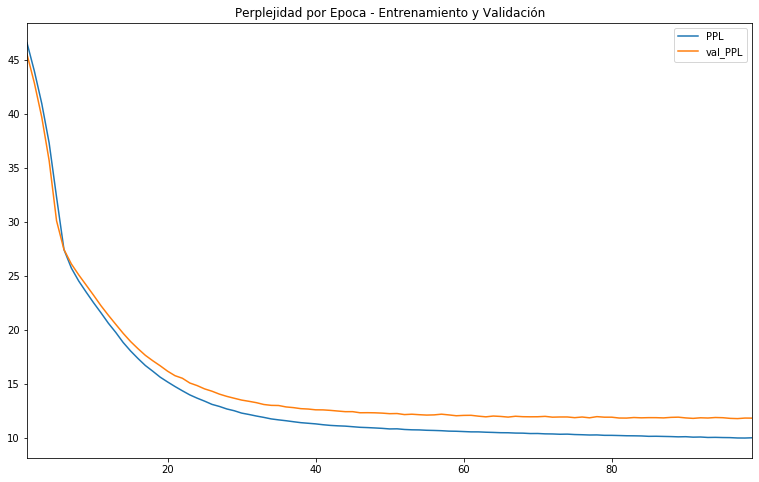

In [31]:
# Ploteamos el gráfico de perplejidad para los conjuntos de entrenamiento y validación.
logs = pd.DataFrame(history.history)
print(logs.columns)
pylab.rcParams['figure.figsize'] = (13, 8)
logs.loc[1:,['PPL','val_PPL']].plot()
plt.title("Perplejidad por Epoca - Entrenamiento y Validación")
plt.show()

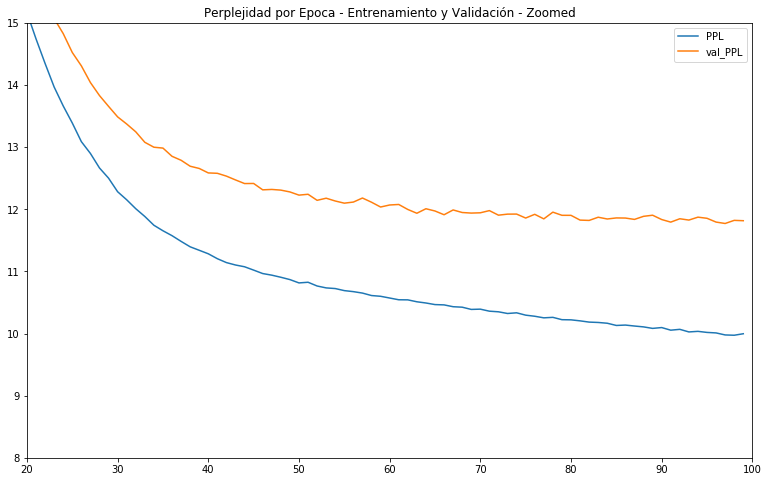

In [32]:
# Enfocar el la ultima etapa de entrenamiento.
pylab.rcParams['figure.figsize'] = (13, 8)
logs.loc[1:,['PPL','val_PPL']].plot()
plt.title("Perplejidad por Epoca - Entrenamiento y Validación - Zoomed")
plt.axis([20,100,8,15])
plt.show()

# 3 Generalizar ejecucion de red neuronal  

In [0]:
# Algunas funciones utilitarias

def show_language(language, word_to_id, train_data):
    print(f'Lenguaje={language}')
    print(f'|Vocabulario|={len(word_to_id)}')
    word_id = pd.DataFrame.from_dict(word_to_id, orient='index').sort_values(by=0, ascending=True)
    word_id.columns = ['id']
    print(word_id.head())
    print(word_id.tail())

    # data esta en forma de lista palabras de lista de secuencias de segmentos IPA.
    transf = lambda word:' '.join([id_to_word[id] for id in word])
    print([transf(word) for word in train_data[:10]])
    print([transf(word) for word in train_data[-10:]])

def configure_model(voc_size, embedding_size, modelParam):
    # Configurar el modelo.
    # Embedding en linea del red neuronal.
    inputs = Input(shape=(None,))
    x = Embedding(input_dim=voc_size,
                  output_dim=embedding_size)(inputs)
    # Este bucle hace todo el trabajo de construcción!
    for chunk in modelParam:
        x = gatedCNNChunk(chunk, K.int_shape(x)[1:])(x)
    # Softmax para la salida.  
    x = Dense(voc_size, activation='softmax')(x)
    model = Model(inputs=inputs, outputs=x)
    model.summary()
    return model

def compile_model(model):
    # Paper usa «Nesterov momentum» con «gradient clipping».
    # RMSprop parece similar a esta combinación.
    from keras.optimizers import RMSprop
    optimizer = RMSprop(lr=1e-4)
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=[ACC, PPL])
    #return model
    
def prepare_callbacks(model_name='model'):
    # Configurar el tensorboard y checkpoint.
    from keras.callbacks import TensorBoard, ModelCheckpoint
    import os
    if not os.path.exists(local_path + 'model/'):
        os.mkdir(local_path + 'model/')
    # guarda el checkpoint en model.keras
    path_model = local_path + 'model/'+model_name+'.keras'    
    tensorboard = TensorBoard(log_dir='log')
    # guarda el modelo durante entrenamiento.
    checkpoint = ModelCheckpoint(filepath=path_model, verbose=1,
                                 monitor='val_PPL',mode='min',save_best_only='True')
    # path_model = local_path + 'model/model.keras'
    # model.save(path_model)
    callback_lists=[tensorboard,checkpoint]
    return callback_lists

def fit_model(model, callback_lists):
    # Usamos python generator (gen_word_word arriba) para entregar los datos.
    # En otras maneras es similar a todos los «fit»
    history = model.fit_generator(generator=gen_word_word(batch_size=32), 
                           steps_per_epoch=100, epochs=100,
                           callbacks=callback_lists,
                           validation_data=gen_word_word(dataset='valid'),
                           validation_steps=15)
    return history

def plot_metric(history):
    logs = pd.DataFrame(history.history)
    print(logs.columns)
    
    pylab.rcParams['figure.figsize'] = (13, 8)
    logs.loc[1:,['PPL','val_PPL']].plot()
    plt.title("Perplejidad por Epoca - Entrenamiento y Validación")
    plt.show()

    # Enfocar el la ultima etapa de entrenamiento.
    pylab.rcParams['figure.figsize'] = (13, 8)
    logs.loc[1:,['PPL','val_PPL']].plot()
    plt.title("Perplejidad por Epoca - Entrenamiento y Validación - Zoomed")
    plt.axis([20,100,5,15])
    plt.show()

def evaluate_test(model):
    # Evaluar con generador tambien.
    score = model.evaluate_generator(gen_word_word(batch_size=32, dataset='test'), steps=50, verbose=False) 
    print('Metrics =', model.metrics_names)
    print(f'Perdida={score[0]:.3f}, Exactitud={score[1]:.3f}, Perplejidad={score[2]:.2f}')
    

# 4 Probabmos con le mejor Modelo de 16 embedding (2S316)

### 4.1 Ingles  

Lenguaje=English
|Vocabulario|=50
       id
<nul>   0
<s>     1
t       2
ɪ       3
s       4
       id
ɛə     45
ɔɪ     46
ʊə     47
ʒ      48
<unk>  49
['t iː', 's t ʌ t ə ɹ', 'f æ m ə l ɪ', 'f æ m ɪ n', 'f ɑː t', 'p ɪ tʃ f ɔː k', 'm ʌ ð ə r ɪ n l ɔː', 'b eɪ t', 's k eɪ l', 't iː tʃ ə ɹ']
['s m ɑː t', 'm ɛ n ɪ', 'l ɑː tʃ', 'f ɔː dʒ', 'p l eɪ', 'j uː', 's p ɪə ɹ', 'ɜː θ k w eɪ k', 't ɜː m aɪ t', 'tʃ ɪ n']
Data size: train=1031, valid=222, test=222

Model: "model_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, None)              0         
_________________________________________________________________
embedding_2 (Embedding)      (None, None, 16)          800       
_________________________________________________________________
model_12 (Model)             (None, None, 16)          1568      
_________________________________________________________________


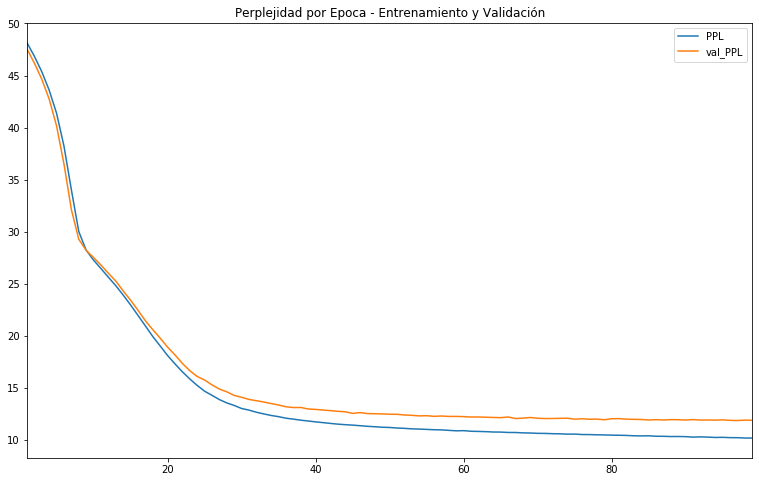

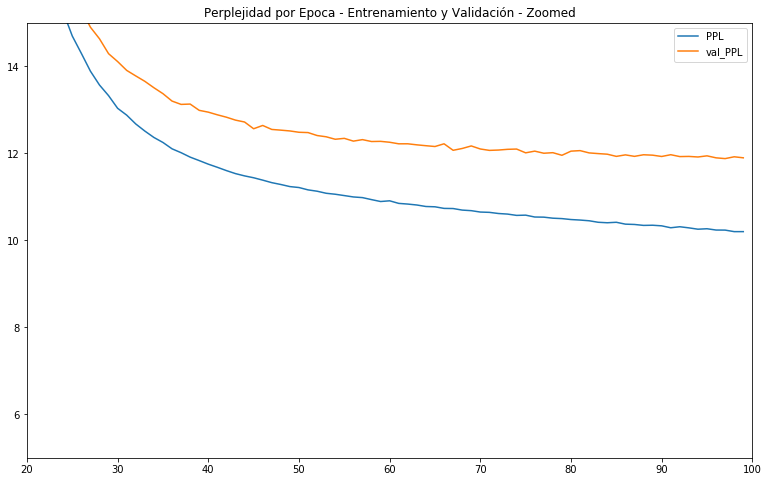

In [35]:
language = 'English'

# Leer el dataset y preparar los conjuntos de entrenamiento, validación y prueba, e ID de palabras
train_data, valid_data, test_data, word_to_id = lang_word_data(root_path + 'data', lang=language) # tokens
id_to_word = dict((v, k) for k, v in word_to_id.items())
voc_size = len(id_to_word)

show_language(language, word_to_id, train_data)
print('Data size: train={0}, valid={1}, test={2}\n'.
      format(len(train_data), len(valid_data), len(test_data)))

seq_len = 50 
modelParam = GCNN_2S316
embedding_size = 16 #16, 32
gCNNModel = configure_model(voc_size, embedding_size, modelParam)
compile_model(gCNNModel)
callback_lists = prepare_callbacks()

history = fit_model(gCNNModel, callback_lists)
plot_metric(history)


### 4.1.1 Prueba / Test  

In [36]:
# Evaluar con generador tambien.
evaluate_test(gCNNModel)

Metrics = ['loss', 'ACC', 'PPL']
Perdida=2.519, Exactitud=0.310, Perplejidad=11.58


### 4.2 Imbabura Quechua -- Usamos el mismo modelo

Lenguaje=Imbabura Quechua
|Vocabulario|=38
       id
<nul>   0
<s>     1
a       2
u       3
i       4
       id
<unk>  33
ú      34
c      35
q      36
β      37
['x a t u n # x u tʃ a', 't a ɾ i n a', 'j u ɾ a', 's u b a k u', 'tʃ a k ɾ a', 'k a ʒ a ɾ i n a', 'w a s k a', 'u ɸ ɾ i s i n a', 'm i ʃ k i', 'k a m i z a']
['j a n u ʃ k a', 'w a ɲ a', 'x a j a x', 'l a b ɾ a d u ɾ', 'ʒ a b i', 'a ʒ p a # x a k u', 'k u tʃ u n a', 't i j u', 's w i d ɾ u', 'j u j a n a']
Data size: train=923, valid=198, test=198

Model: "model_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        (None, None)              0         
_________________________________________________________________
embedding_3 (Embedding)      (None, None, 16)          608       
_________________________________________________________________
model_18 (Model)             (None, None, 16)          1568      
_____

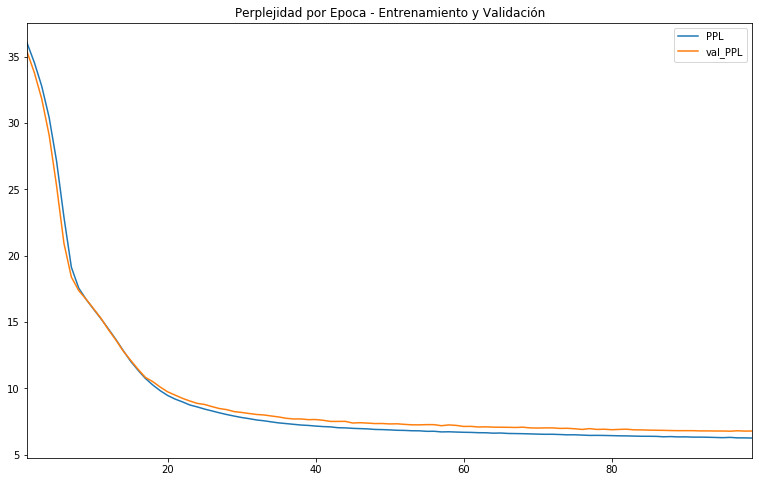

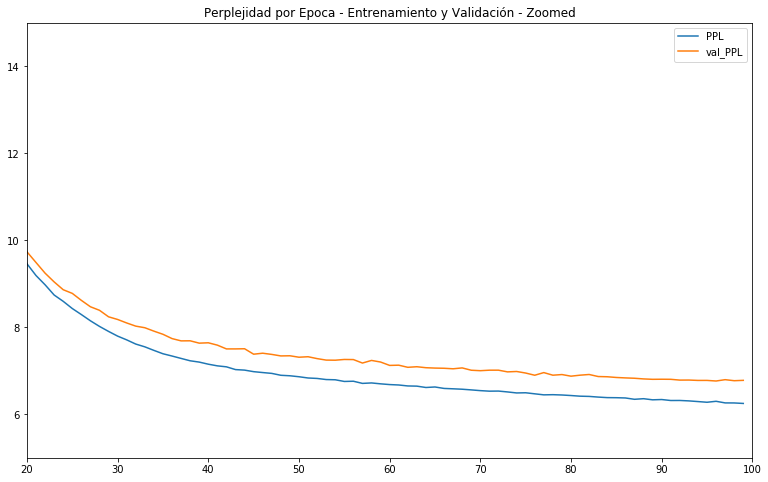

Metrics = ['loss', 'ACC', 'PPL']
Perdida=1.969, Exactitud=0.401, Perplejidad=6.68


In [37]:
language = 'Imbabura Quechua'

# Leer el dataset y preparar los conjuntos de entrenamiento, validación y prueba, e ID de palabras
train_data, valid_data, test_data, word_to_id = lang_word_data(root_path + 'data', lang=language) # tokens
id_to_word = dict((v, k) for k, v in word_to_id.items())
voc_size = len(id_to_word)

show_language(language, word_to_id, train_data)
print('Data size: train={0}, valid={1}, test={2}\n'.
      format(len(train_data), len(valid_data), len(test_data)))

seq_len = 50 
modelParam = GCNN_2S316
embedding_size = 16 #16, 32
gCNNModel = configure_model(voc_size, embedding_size, modelParam)
compile_model(gCNNModel)
callback_lists = prepare_callbacks()

history = fit_model(gCNNModel, callback_lists)
plot_metric(history)

# Evaluar con generador tambien.
evaluate_test(gCNNModel)

## 4.3 Hup

Lenguaje=Hup
|Vocabulario|=74
       id
<nul>   0
<s>     1
h       2
t       3
ʔ       4
       id
<unk>  69
v      70
c’     71
ĩ´     72
ɨ̃´    73
['g’ ɨ́', 'm i ŋ', 't ǎ h # m ɔ j', 'b ó t a', 'n ɨ h', 'j a ŋ', 't ǎ w', 'c u g’ æ̌ t', 'h a m + h ũ j n ɨ́ h', 'm a m á ŋ']
['m á h', 't ɔ̃´ h', 't æ̃´ h j u d', 'p ɨ̌ ŋ', 'ɟ’ ɔ m', 'm é c a b’ a h', 'ɟ’ i b # k ã k ã´ w', 'p á', 'h i p ã h', 't ǎ k']
Data size: train=825, valid=177, test=177

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1058 (InputLayer)      (None, None)              0         
_________________________________________________________________
embedding_107 (Embedding)    (None, None, 16)          1184      
_________________________________________________________________
model_1053 (Model)           (None, None, 16)          1568      
_________________________________________________________________
model_1056 (Model)       

100/100 [==============================] - 2s 25ms/step - loss: 2.8891 - ACC: 0.2683 - PPL: 15.6305 - val_loss: 2.8784 - val_ACC: 0.2746 - val_PPL: 15.4731

Epoch 00027: val_PPL improved from 15.73608 to 15.47307, saving model to ./model/model.keras
Epoch 28/100
100/100 [==============================] - 3s 25ms/step - loss: 2.8669 - ACC: 0.2703 - PPL: 15.3178 - val_loss: 2.8643 - val_ACC: 0.2766 - val_PPL: 15.2883

Epoch 00028: val_PPL improved from 15.47307 to 15.28826, saving model to ./model/model.keras
Epoch 29/100
100/100 [==============================] - 2s 24ms/step - loss: 2.8479 - ACC: 0.2716 - PPL: 15.0622 - val_loss: 2.8426 - val_ACC: 0.2785 - val_PPL: 14.9948

Epoch 00029: val_PPL improved from 15.28826 to 14.99482, saving model to ./model/model.keras
Epoch 30/100
100/100 [==============================] - 2s 25ms/step - loss: 2.8301 - ACC: 0.2731 - PPL: 14.8280 - val_loss: 2.8263 - val_ACC: 0.2803 - val_PPL: 14.7815

Epoch 00030: val_PPL improved from 14.99482 to 14.7815


Epoch 00059: val_PPL improved from 12.85840 to 12.81177, saving model to ./model/model.keras
Epoch 60/100
100/100 [==============================] - 4s 37ms/step - loss: 2.6081 - ACC: 0.3099 - PPL: 12.2482 - val_loss: 2.6526 - val_ACC: 0.3127 - val_PPL: 12.8041

Epoch 00060: val_PPL improved from 12.81177 to 12.80409, saving model to ./model/model.keras
Epoch 61/100
100/100 [==============================] - 4s 36ms/step - loss: 2.6043 - ACC: 0.3097 - PPL: 12.2086 - val_loss: 2.6465 - val_ACC: 0.3128 - val_PPL: 12.7325

Epoch 00061: val_PPL improved from 12.80409 to 12.73247, saving model to ./model/model.keras
Epoch 62/100
100/100 [==============================] - 4s 36ms/step - loss: 2.5996 - ACC: 0.3114 - PPL: 12.1572 - val_loss: 2.6478 - val_ACC: 0.3134 - val_PPL: 12.7546

Epoch 00062: val_PPL did not improve from 12.73247
Epoch 63/100
100/100 [==============================] - 4s 38ms/step - loss: 2.5952 - ACC: 0.3124 - PPL: 12.1099 - val_loss: 2.6500 - val_ACC: 0.3109 - val_PPL

100/100 [==============================] - 3s 31ms/step - loss: 2.4928 - ACC: 0.3299 - PPL: 11.0173 - val_loss: 2.6043 - val_ACC: 0.3207 - val_PPL: 12.3137

Epoch 00094: val_PPL improved from 12.31511 to 12.31366, saving model to ./model/model.keras
Epoch 95/100
100/100 [==============================] - 3s 34ms/step - loss: 2.4887 - ACC: 0.3309 - PPL: 10.9741 - val_loss: 2.6050 - val_ACC: 0.3223 - val_PPL: 12.3240

Epoch 00095: val_PPL did not improve from 12.31366
Epoch 96/100
100/100 [==============================] - 3s 32ms/step - loss: 2.4854 - ACC: 0.3306 - PPL: 10.9392 - val_loss: 2.6019 - val_ACC: 0.3236 - val_PPL: 12.2872

Epoch 00096: val_PPL improved from 12.31366 to 12.28721, saving model to ./model/model.keras
Epoch 97/100
100/100 [==============================] - 3s 30ms/step - loss: 2.4821 - ACC: 0.3309 - PPL: 10.9038 - val_loss: 2.5983 - val_ACC: 0.3227 - val_PPL: 12.2437

Epoch 00097: val_PPL improved from 12.28721 to 12.24372, saving model to ./model/model.keras
Epo

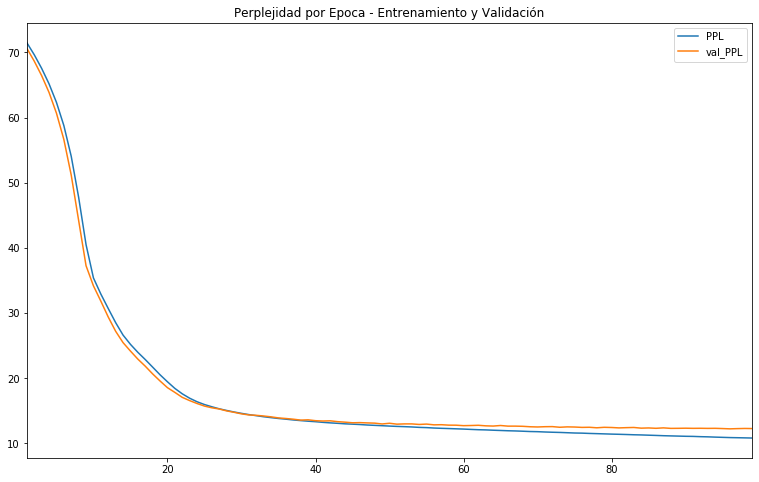

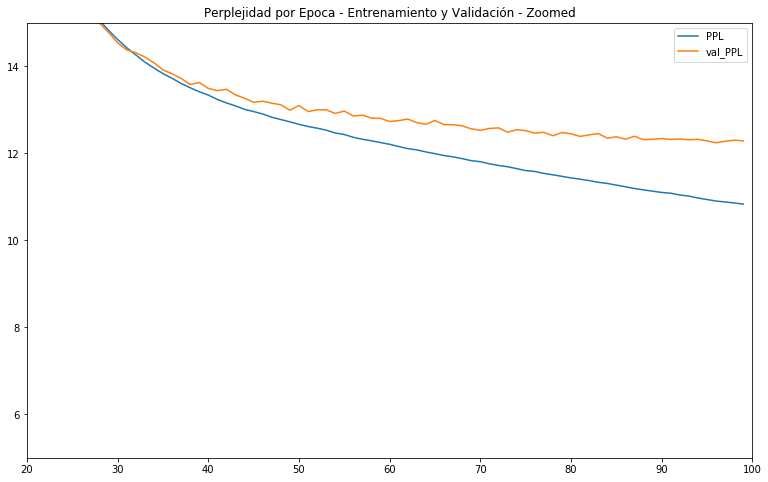

Metrics = ['loss', 'ACC', 'PPL']
Perdida=2.696, Exactitud=0.304, Perplejidad=13.51


In [0]:
language = 'Hup'

# Leer el dataset y preparar los conjuntos de entrenamiento, validación y prueba, e ID de palabras
train_data, valid_data, test_data, word_to_id = lang_word_data(root_path + 'data', lang=language) # tokens
id_to_word = dict((v, k) for k, v in word_to_id.items())
voc_size = len(id_to_word)

show_language(language, word_to_id, train_data)
print('Data size: train={0}, valid={1}, test={2}\n'.
      format(len(train_data), len(valid_data), len(test_data)))

seq_len = 50 
modelParam = GCNN_2S316
embedding_size = 16 #16, 32
gCNNModel = configure_model(voc_size, embedding_size, modelParam)
compile_model(gCNNModel)
callback_lists = prepare_callbacks()

history = fit_model(gCNNModel, callback_lists)
plot_metric(history)

# Evaluar con generador tambien.
evaluate_test(gCNNModel)

## 4.4 Wichí  

Lenguaje=Wichí
|Vocabulario|=47
       id
<nul>   0
<s>     1
a       2
e       3
i       4
       id
<?>    42
ˀw     43
<unk>  44
b      45
c      46
['n ʔ o j i x', 'h u n a ts i', 'a t u fʷ tʃ o ʔ', 'lˠ a ʔ # lˠ e tʃ ʔ e l̥', 's i p u t k a', 't a tʃ ʔ u pʷ a j', 'l j e s', 't e ts e j', 't o t t e lˠ u # t ʔ o x', 't a j h i']
['p a x tʃ e # j i h a n tʃ ʔ u j a', 's a w u l u', 't o lˠ a hʷ u', 'i l u', 't o t k o s l e j', 'p i t a x', 'a k o x pʰ o', 't a tʃ e m a', 't o l e t', 't o t t e lˠ u']
Data size: train=951, valid=205, test=205

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1064 (InputLayer)      (None, None)              0         
_________________________________________________________________
embedding_108 (Embedding)    (None, None, 16)          752       
_________________________________________________________________
model_1059 (Model)           (None, None, 16)      

100/100 [==============================] - 2s 18ms/step - loss: 2.5504 - ACC: 0.2860 - PPL: 11.2010 - val_loss: 2.6042 - val_ACC: 0.2655 - val_PPL: 11.8175

Epoch 00026: val_PPL improved from 12.14870 to 11.81751, saving model to ./model/model.keras
Epoch 27/100
100/100 [==============================] - 2s 17ms/step - loss: 2.5220 - ACC: 0.2891 - PPL: 10.8955 - val_loss: 2.5806 - val_ACC: 0.2679 - val_PPL: 11.5526

Epoch 00027: val_PPL improved from 11.81751 to 11.55256, saving model to ./model/model.keras
Epoch 28/100
100/100 [==============================] - 2s 17ms/step - loss: 2.5006 - ACC: 0.2907 - PPL: 10.6768 - val_loss: 2.5607 - val_ACC: 0.2687 - val_PPL: 11.3396

Epoch 00028: val_PPL improved from 11.55256 to 11.33960, saving model to ./model/model.keras
Epoch 29/100
100/100 [==============================] - 2s 18ms/step - loss: 2.4805 - ACC: 0.2921 - PPL: 10.4774 - val_loss: 2.5388 - val_ACC: 0.2722 - val_PPL: 11.1093

Epoch 00029: val_PPL improved from 11.33960 to 11.1092

100/100 [==============================] - 4s 44ms/step - loss: 2.2589 - ACC: 0.3394 - PPL: 8.7491 - val_loss: 2.3518 - val_ACC: 0.3109 - val_PPL: 9.6019

Epoch 00058: val_PPL improved from 9.63269 to 9.60192, saving model to ./model/model.keras
Epoch 59/100
100/100 [==============================] - 5s 46ms/step - loss: 2.2562 - ACC: 0.3388 - PPL: 8.7326 - val_loss: 2.3535 - val_ACC: 0.3088 - val_PPL: 9.6264

Epoch 00059: val_PPL did not improve from 9.60192
Epoch 60/100
100/100 [==============================] - 5s 51ms/step - loss: 2.2509 - ACC: 0.3387 - PPL: 8.6953 - val_loss: 2.3508 - val_ACC: 0.3108 - val_PPL: 9.6085

Epoch 00060: val_PPL did not improve from 9.60192
Epoch 61/100
100/100 [==============================] - 6s 63ms/step - loss: 2.2475 - ACC: 0.3390 - PPL: 8.6742 - val_loss: 2.3472 - val_ACC: 0.3098 - val_PPL: 9.5816

Epoch 00061: val_PPL improved from 9.60192 to 9.58165, saving model to ./model/model.keras
Epoch 62/100
100/100 [==============================] - 7s 

100/100 [==============================] - 3s 26ms/step - loss: 2.1682 - ACC: 0.3529 - PPL: 8.1374 - val_loss: 2.2891 - val_ACC: 0.3132 - val_PPL: 9.1802

Epoch 00092: val_PPL did not improve from 9.15318
Epoch 93/100
100/100 [==============================] - 3s 25ms/step - loss: 2.1682 - ACC: 0.3531 - PPL: 8.1391 - val_loss: 2.2858 - val_ACC: 0.3167 - val_PPL: 9.1528

Epoch 00093: val_PPL improved from 9.15318 to 9.15281, saving model to ./model/model.keras
Epoch 94/100
100/100 [==============================] - 3s 26ms/step - loss: 2.1669 - ACC: 0.3530 - PPL: 8.1302 - val_loss: 2.2891 - val_ACC: 0.3151 - val_PPL: 9.1862

Epoch 00094: val_PPL did not improve from 9.15281
Epoch 95/100
100/100 [==============================] - 3s 27ms/step - loss: 2.1620 - ACC: 0.3536 - PPL: 8.0939 - val_loss: 2.2859 - val_ACC: 0.3182 - val_PPL: 9.1586

Epoch 00095: val_PPL did not improve from 9.15281
Epoch 96/100
100/100 [==============================] - 3s 26ms/step - loss: 2.1635 - ACC: 0.3533 - 

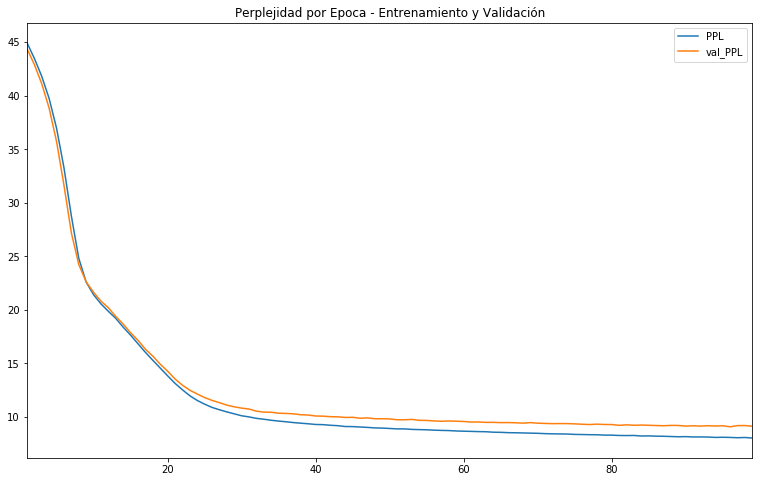

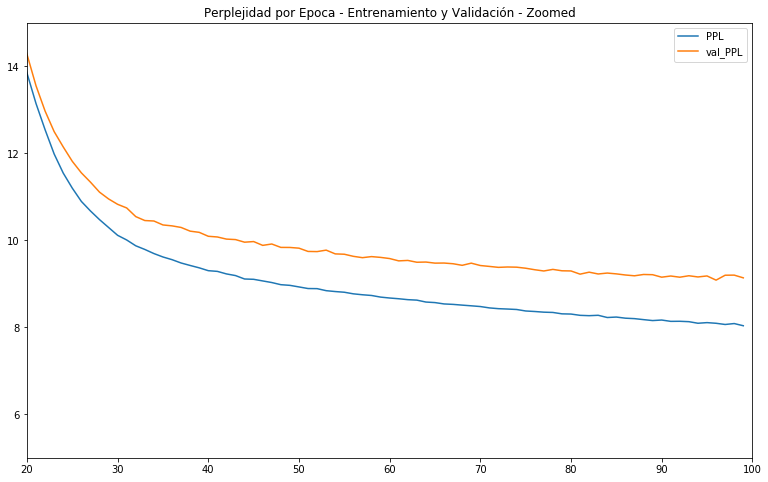

Metrics = ['loss', 'ACC', 'PPL']
Perdida=2.169, Exactitud=0.339, Perplejidad=8.16


In [0]:
language = 'Wichí'

# Leer el dataset y preparar los conjuntos de entrenamiento, validación y prueba, e ID de palabras
train_data, valid_data, test_data, word_to_id = lang_word_data(root_path + 'data', lang=language) # tokens
id_to_word = dict((v, k) for k, v in word_to_id.items())
voc_size = len(id_to_word)

show_language(language, word_to_id, train_data)
print('Data size: train={0}, valid={1}, test={2}\n'.
      format(len(train_data), len(valid_data), len(test_data)))

seq_len = 50 
modelParam = GCNN_2S316
embedding_size = 16 #16, 32
gCNNModel = configure_model(voc_size, embedding_size, modelParam)
compile_model(gCNNModel)
callback_lists = prepare_callbacks()

history = fit_model(gCNNModel, callback_lists)
plot_metric(history)

# Evaluar con generador tambien.
evaluate_test(gCNNModel)

## 4.5 Mapudungun

Lenguaje=Mapudungun
|Vocabulario|=38
       id
<nul>   0
<s>     1
a       2
n       3
e       4
       id
ns     33
+      34
b      35
v      36
<unk>  37
['w e z a l k a l e y', 'a w k a n t u n', 'ʈʂ a ɻ i n', 'l i f ɻ u', 'w ɨ tʃ ɨ n', 'm e f ɨ ɻ ɨ n', 'k i s u # ŋ ɨ n e w k ɨ l e n', 'm a ŋ k ɨ n', 'ɲ i m i t u n', 'p ɨ ʈʂ a']
['e y m u', 'k ɨ l e n', 'l i ɣ e n', 'p i tʃ i # l̪ a f k e n̪', 'f o t ɨ m', 'l i ɣ # k u y ɨ m', 'i n a n # l a m ŋ e n', 'ʈʂ ɨ l k e', 'w i ʎ i n', 'ʈʂ i l ʈʂ a ŋ']
Data size: train=988, valid=212, test=212

Model: "model_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_23 (InputLayer)        (None, None)              0         
_________________________________________________________________
embedding_4 (Embedding)      (None, None, 16)          608       
_________________________________________________________________
model_24 (Model)             (None, Non

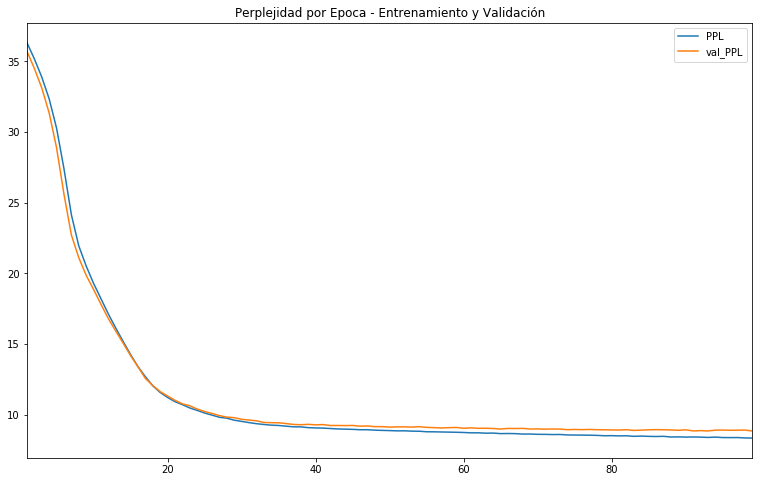

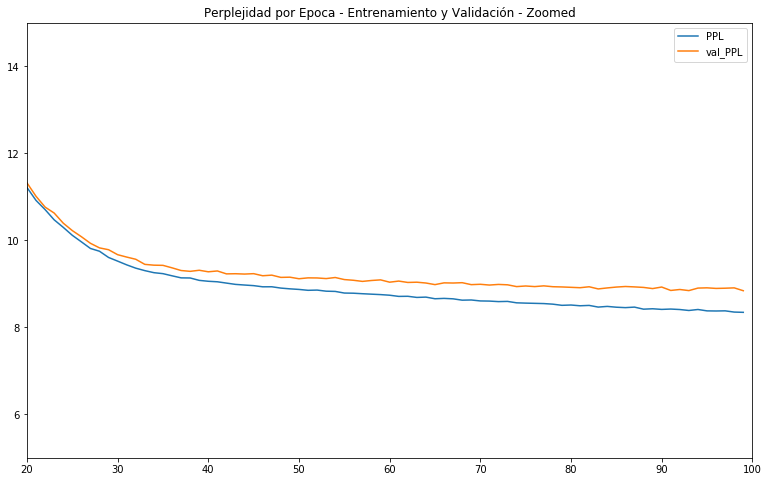

Metrics = ['loss', 'ACC', 'PPL']
Perdida=2.283, Exactitud=0.327, Perplejidad=9.24


In [38]:
language = 'Mapudungun'

# Leer el dataset y preparar los conjuntos de entrenamiento, validación y prueba, e ID de palabras
train_data, valid_data, test_data, word_to_id = lang_word_data(root_path + 'data', lang=language) # tokens
id_to_word = dict((v, k) for k, v in word_to_id.items())
voc_size = len(id_to_word)

show_language(language, word_to_id, train_data)
print('Data size: train={0}, valid={1}, test={2}\n'.
      format(len(train_data), len(valid_data), len(test_data)))

seq_len = 50 
modelParam = GCNN_2S316
embedding_size = 16 #16, 32
gCNNModel = configure_model(voc_size, embedding_size, modelParam)
compile_model(gCNNModel)
callback_lists = prepare_callbacks()

history = fit_model(gCNNModel, callback_lists)
plot_metric(history)

# Evaluar con generador tambien.
evaluate_test(gCNNModel)

# 6 Prediccion y probabilidad de una palabra  

In [0]:
# Definir una función que permita utilizar el modelo para predecir una secuencia.
def predict_seq(model, preSeq=None, genLen=seq_len, power=1):
    """ Predict a sequence with length genLen.
        arg:
            model: Keras model used to predict.
            preSeq: list. The leading sequence.
            genLen: float or np.inf. If power is equal to np.inf, then an argmax will be used. 
            power: Probility power.
    """
    # Establecer preSeq.
    preSeq = [word_to_id['<s>']] if preSeq == None else [word_to_id['<s>']] + preSeq   
    pointer = len(preSeq) - 1
    
    # Iterar genLen para agregar cada predicción a preSeq
    for _ in range(genLen):
        inputSeq = np.array([preSeq])
        prob = model.predict(inputSeq)[0, pointer, :]
        # Evitar que <nul> seria opcion.
        probnul = prob[0]
        prob[0] = 0.0
        prob /= (1-probnul)
        
        if power==np.inf:
            pred = np.argmax(prob)
        else:
            prob = np.power(prob, power)
            prob = prob / np.sum(prob)
            pred = np.random.choice(range(voc_size), p=prob)
        preSeq.append(pred)
        pointer = pointer + 1

    return preSeq, ' '.join([id_to_word[id] for id in preSeq])

In [40]:
# Predecir una secuencia.
_, seq = predict_seq(gCNNModel, power=1)
seq

'<s> p u s i <s> p o ʃ i <s> f ɨ l e l̪ <s> ɨ n ɨ ŋ e n <s> tʃ u m u <s> o l k a s # ɲ i # k a z u k o <s> ɻ a n <s> w e'

## 6.1 Calcular entropia y perplejidad de una palabra


In [0]:
# Función para calcular entropia(palabra), prob(palabra) por caracter.
def calc_word_entropy(model, text):
    text = text.split()
    x_text = text[:-1]
    y_text = text[1:]
    x_ids = [word_to_id[c] for c in x_text]
    y_ids = [word_to_id[c] for c in y_text]
    probs = model.predict(x_ids).max(1)
    word_lns = [math.log(probs[i, y_ids[i]]) for i in range(len(probs))]
    # Ajustar por los <nul>, que son artifactos del algoritmo.
    #print('prob <nul>', [1-probs[i,0] for i in range(len(probs))])
    word_lns_adj = [math.log(probs[i, y_ids[i]]/(1-probs[i, 0])) for i in range(len(probs))]
    # Devolver ambos entropia y entropia ajustada.
    return -sum(word_lns)/len(word_lns), -sum(word_lns_adj)/len(word_lns_adj)

In [0]:
# Probar la funcion.
avg_word_entropy, avg_word_entropy_adj = calc_word_entropy(gCNNModel, '<s> ɨ n ɨ ŋ e n <s>')

In [43]:
print(f'entropia = {avg_word_entropy:.3f}', 
      f'perplejidad = {math.exp(avg_word_entropy):.2f}', 
      f'probabilidad = {math.exp(-avg_word_entropy):.4f}')
print(f'entropia(adj) = {avg_word_entropy_adj:.3f}', 
      f'perplejidad(adj) = {math.exp(avg_word_entropy_adj):.2f}', 
      f'probabilidad = {math.exp(-avg_word_entropy_adj):.4f}')


entropia = 2.107 perplejidad = 8.22 probabilidad = 0.1216
entropia(adj) = 2.097 perplejidad(adj) = 8.15 probabilidad = 0.1228
